In [1]:
import numpy as np
import pandas as pd
import pynwb
from matplotlib import pyplot as plt
%matplotlib inline

# Load NWB file

In [2]:
nwb_path = '/data/742903_2024-10-22.nwb'

In [3]:
nwb = pynwb.NWBHDF5IO(nwb_path).read()

# Trials table

In [4]:
trials = nwb.trials.to_dataframe()

In [5]:
trials.head()

,start_time,stop_time,quiescent_start_time,quiescent_stop_time,stim_start_time,stim_stop_time,response_window_start_time,response_window_stop_time,task_control_response_time,response_time,...,is_aud_target,is_vis_target,is_nontarget,is_aud_nontarget,is_vis_nontarget,is_vis_context,is_aud_context,is_context_switch,is_repeat,is_opto
id,,,,,,,,,,,,,,,,,,,,,
0,2519.80321,2525.30780,2519.80321,2521.30452,2521.31188,2521.81188,2521.38786,2522.30530,2521.83822,2521.82993,...,True,False,False,False,False,False,True,False,False,False
1,2525.44123,2530.94584,2525.44123,2526.94250,2526.94985,2527.44985,2527.02589,2527.94336,2527.12598,2527.11877,...,True,False,False,False,False,False,True,False,False,False
2,2536.26697,2541.77160,2536.26697,2537.76829,2537.77573,2538.27573,2537.85162,2538.76911,2537.96839,2537.95773,...,True,False,False,False,False,False,True,False,False,False
3,2542.27204,2547.77662,2542.27204,2543.77327,2543.78094,2544.28094,2543.85669,2544.77445,2543.97345,2543.96458,...,True,False,False,False,False,False,True,False,False,False
4,2551.89673,2557.40138,2551.89673,2553.39799,2553.40561,2553.90561,2553.48137,2554.39889,2553.58150,2553.56528,...,True,False,False,False,False,False,True,False,False,False


In [6]:
sorted(trials.columns)

['block_index',
 'context_name',
 'is_aud_context',
 'is_aud_nontarget',
 'is_aud_stim',
 'is_aud_target',
 'is_catch',
 'is_context_switch',
 'is_contingent_reward',
 'is_correct',
 'is_correct_reject',
 'is_false_alarm',
 'is_go',
 'is_hit',
 'is_incorrect',
 'is_miss',
 'is_nogo',
 'is_noncontingent_reward',
 'is_nontarget',
 'is_opto',
 'is_repeat',
 'is_response',
 'is_reward_scheduled',
 'is_rewarded',
 'is_target',
 'is_vis_context',
 'is_vis_nontarget',
 'is_vis_stim',
 'is_vis_target',
 'post_response_window_start_time',
 'post_response_window_stop_time',
 'quiescent_start_time',
 'quiescent_stop_time',
 'repeat_index',
 'response_time',
 'response_window_start_time',
 'response_window_stop_time',
 'reward_time',
 'start_time',
 'stim_name',
 'stim_start_time',
 'stim_stop_time',
 'stop_time',
 'task_control_response_time',
 'trial_index',
 'trial_index_in_block']

### Example: compute response time histogram from trials table

In [7]:
reaction_times = trials.response_time - trials.stim_start_time

In [8]:
reaction_times

id
0      0.51805
1      0.16892
2      0.18200
3      0.18364
4      0.15967
        ...   
533        NaN
534        NaN
535        NaN
536        NaN
537    0.49307
Length: 538, dtype: float64

Text(0, 0.5, 'Counts')

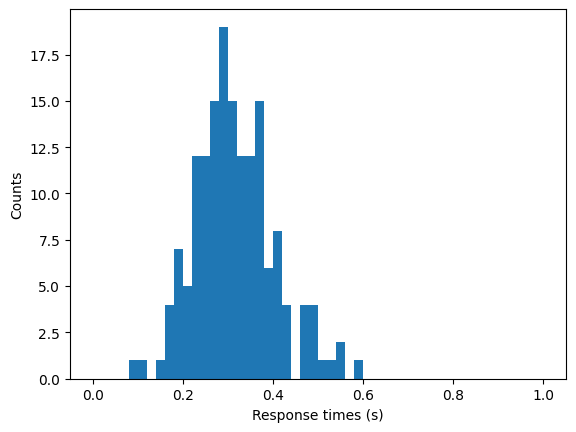

In [9]:
fig,ax = plt.subplots(1,1)
ax.hist(reaction_times,bins=50,range=(0,1));
ax.set_xlabel('Response times (s)')
ax.set_ylabel('Counts')

# Units table

In [10]:
units = nwb.units.to_dataframe()

In [11]:
units.head(2)

,amplitude_cutoff,amplitude_cv_median,amplitude_cv_range,amplitude_median,drift_ptp,drift_std,drift_mad,firing_range,firing_rate,isi_violations_ratio,...,unit_id,ccf_ap,ccf_dv,ccf_ml,structure,location,peak_electrode,spike_times,obs_intervals,electrode_group
id,,,,,,,,,,,,,,,,,,,,,
0,0.000024,0.119623,0.091381,236.340000,10.051738,1.746884,0.646459,3.8,4.891656,0.001804,...,742903_2024-10-22_A-0,4450.0,4400.0,4950.0,LSr,LSr,0,"[20.28927901589777, 20.311845609610423, 20.462...","[[20.22514588989608, 7742.738080300452]]",probeA pynwb.ecephys.ElectrodeGroup at 0x14049...
1,0.002602,0.325891,0.232566,60.839996,NaN,NaN,NaN,0.4,0.113434,3.354522,...,742903_2024-10-22_A-1,4450.0,4400.0,4950.0,LSr,LSr,1,"[22.243439365091692, 24.726864669927423, 26.76...","[[20.22514588989608, 7742.738080300452]]",probeA pynwb.ecephys.ElectrodeGroup at 0x14049...


In [12]:
sorted(units.columns)

['amplitude',
 'amplitude_cutoff',
 'amplitude_cv_median',
 'amplitude_cv_range',
 'amplitude_median',
 'ccf_ap',
 'ccf_dv',
 'ccf_ml',
 'cluster_id',
 'd_prime',
 'default_qc',
 'drift_mad',
 'drift_ptp',
 'drift_std',
 'electrode_group',
 'electrode_group_name',
 'exp_decay',
 'firing_range',
 'firing_rate',
 'half_width',
 'isi_violations_count',
 'isi_violations_ratio',
 'isolation_distance',
 'l_ratio',
 'location',
 'nn_hit_rate',
 'nn_miss_rate',
 'num_negative_peaks',
 'num_positive_peaks',
 'num_spikes',
 'obs_intervals',
 'peak_channel',
 'peak_electrode',
 'peak_to_valley',
 'peak_trough_ratio',
 'presence_ratio',
 'recovery_slope',
 'repolarization_slope',
 'rp_contamination',
 'rp_violations',
 'silhouette',
 'sliding_rp_violation',
 'snr',
 'spike_times',
 'spread',
 'structure',
 'sync_spike_2',
 'sync_spike_4',
 'sync_spike_8',
 'unit_id',
 'velocity_above',
 'velocity_below']

### Example: which brain regions are recorded?

In [13]:
units.structure.value_counts()

structure
MOs             1116
SSp              857
ORBvl            433
ILA              279
CP               265
TTd              240
SSs              169
ORBm             157
ACAd             134
ORBl             132
GU               103
PL                98
LSr               86
VISal             76
out of brain      54
CA3               51
ACAv              48
CA1               40
LGv               36
FRP               28
AIp               19
OLF               17
DG                 8
Name: count, dtype: int64

# IMPORTANT: Not all units returned from spike sorting are "good"

#### Filter units to only include those passing manual QC

In [14]:
# Filter units based on manual QC file
unit_qc_file = '/data/manual_qc.csv'
unit_qc = pd.read_csv(unit_qc_file)
units = pd.merge(units,unit_qc,on='unit_id')
units = units[units.manual_qc==True]

In [15]:
units.structure.value_counts()

structure
SSp             603
MOs             548
ORBvl           314
ILA             214
CP              160
SSs             150
TTd             135
ORBm            103
ORBl             91
GU               77
ACAd             76
PL               68
LSr              66
out of brain     51
ACAv             35
VISal            33
CA1              23
FRP              22
CA3              22
AIp              19
OLF              11
LGv               7
DG                3
Name: count, dtype: int64